In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry import Point, LineString
import geopandas as gpd
from matplotlib.ticker import AutoMinorLocator

In [2]:
url_template = 'https://www.ndbc.noaa.gov/view_text_file.php?filename=46042h{year}.txt.gz&dir=data/historical/stdmet/'
    
# create an empty list to store the data frames
dfs = []

# loop through the years
for year in range(2000, 2005):

    # construct the file path
    url = url_template.format(year=year)
    
    # parse the data and create a data frame
    df = pd.read_csv(url, delim_whitespace=True, skiprows=1, header=None, names=['year', 'month', 'day', 'hour', 'wdir', 'wspd', 'gst', 'wvht', 'dpd', 'apd', 'mwd', 'pres', 'atmp', 'wtmp', 'dewp', 'vis', 'ptdy', 'tide'])
    
    # add the data frame to the list
    dfs.append(df)

# concatenate all the data frames into a single data frame
df = pd.concat(dfs, ignore_index=True)

# print the resulting data frame
df.head()

,year,month,day,hour,wdir,wspd,gst,wvht,dpd,apd,mwd,pres,atmp,wtmp,dewp,vis,ptdy,tide
0,2000,1,1,0,297,4.9,6.1,1.22,7.14,5.68,323,1017.4,11.0,11.6,6.5,99.0,NaN,NaN
1,2000,1,1,1,305,5.2,6.4,1.33,6.67,5.60,320,1017.6,11.1,11.7,6.7,99.0,NaN,NaN
2,2000,1,1,2,302,5.5,6.7,1.29,7.14,5.41,324,1018.1,11.2,11.6,6.7,99.0,NaN,NaN
3,2000,1,1,3,304,2.4,3.1,1.22,7.14,5.70,320,1018.1,11.3,11.6,6.6,99.0,NaN,NaN
4,2000,1,1,4,292,4.7,6.1,1.27,6.67,5.90,321,1018.5,11.5,11.6,7.2,99.0,NaN,NaN


In [3]:
dfs2 = []
for year in range(2005, 2023):
    url = url_template.format(year=year)
    df2 = pd.read_csv(url, delim_whitespace=True, skiprows=1, header=None, names=['year', 'month', 'day', 'hour', 'minute', 'wdir', 'wspd', 'gst', 'wvht', 'dpd', 'apd', 'mwd', 'pres', 'atmp', 'wtmp', 'dewp', 'vis', 'ptdy', 'tide'])
    dfs2.append(df2)

df2 = pd.concat(dfs2, ignore_index=True)

# print the 2000 - 2005 range
df2.head()

/Users/dylan/opt/anaconda3/envs/geo2023spring/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,month,day,hour,minute,wdir,wspd,gst,wvht,dpd,apd,mwd,pres,atmp,wtmp,dewp,vis,ptdy,tide
0,2005,1,1,0,0,216,7.4,8.6,2.8,12.9,7.83,293,1011.8,12.4,13.8,999.0,99.0,99.0,NaN
1,2005,1,1,1,0,198,8.1,9.3,2.84,12.12,7.74,292,1011.6,12.3,13.8,999.0,99.0,99.0,NaN
2,2005,1,1,2,0,206,8.4,10.1,2.94,12.9,7.62,288,1011.5,12.6,13.8,999.0,99.0,99.0,NaN
3,2005,1,1,3,0,223,8.9,10.5,2.91,12.12,7.29,298,1011.8,11.5,13.8,999.0,99.0,99.0,NaN
4,2005,1,1,4,0,215,8.4,10.9,2.77,12.9,7.16,294,1012.1,12.1,13.8,999.0,99.0,99.0,NaN


In [4]:
data_list = [df, df2]
data_list = pd.concat(data_list, ignore_index=True)
print(data_list.head())

   year month day hour wdir wspd  gst  wvht   dpd   apd  mwd    pres  atmp  \
0  2000     1   1    0  297  4.9  6.1  1.22  7.14  5.68  323  1017.4  11.0   
1  2000     1   1    1  305  5.2  6.4  1.33  6.67   5.6  320  1017.6  11.1   
2  2000     1   1    2  302  5.5  6.7  1.29  7.14  5.41  324  1018.1  11.2   
3  2000     1   1    3  304  2.4  3.1  1.22  7.14   5.7  320  1018.1  11.3   
4  2000     1   1    4  292  4.7  6.1  1.27  6.67   5.9  321  1018.5  11.5   

   wtmp dewp   vis ptdy  tide minute  
0  11.6  6.5  99.0  NaN   NaN    NaN  
1  11.7  6.7  99.0  NaN   NaN    NaN  
2  11.6  6.7  99.0  NaN   NaN    NaN  
3  11.6  6.6  99.0  NaN   NaN    NaN  
4  11.6  7.2  99.0  NaN   NaN    NaN  


In [5]:
data_list

,year,month,day,hour,wdir,wspd,gst,wvht,dpd,apd,mwd,pres,atmp,wtmp,dewp,vis,ptdy,tide,minute
0,2000,1,1,0,297,4.9,6.1,1.22,7.14,5.68,323,1017.4,11.0,11.6,6.5,99.0,NaN,NaN,NaN
1,2000,1,1,1,305,5.2,6.4,1.33,6.67,5.6,320,1017.6,11.1,11.7,6.7,99.0,NaN,NaN,NaN
2,2000,1,1,2,302,5.5,6.7,1.29,7.14,5.41,324,1018.1,11.2,11.6,6.7,99.0,NaN,NaN,NaN
3,2000,1,1,3,304,2.4,3.1,1.22,7.14,5.7,320,1018.1,11.3,11.6,6.6,99.0,NaN,NaN,NaN
4,2000,1,1,4,292,4.7,6.1,1.27,6.67,5.9,321,1018.5,11.5,11.6,7.2,99.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335800,2022,12,31,23,297,10.4,15.2,99.0,99.0,99.0,999,1001.6,12.2,999.0,999.0,99.0,99.0,NaN,10
335801,2022,12,31,23,296,11.9,15.5,99.0,99.0,99.0,999,1001.5,12.2,999.0,999.0,99.0,99.0,NaN,20
335802,2022,12,31,23,302,13.0,17.9,99.0,99.0,99.0,999,1001.3,12.3,999.0,999.0,99.0,99.0,NaN,30
335803,2022,12,31,23,307,13.5,18.4,3.86,12.9,7.17,272,1001.2,12.3,999.0,999.0,99.0,99.0,NaN,40


In [6]:
# need to get rid of strings 
data_clean = data_list[data_list['wvht'] != 'm']
# data_clean

# to datetime index 
date_cols = ['year','month','day','hour']
data_clean['time'] = pd.to_datetime(data_clean[date_cols])
data_clean.set_index('time',inplace=True)
data_clean.drop(date_cols,axis=1,inplace=True)
cols_to_drop = ['pres','atmp','dewp','vis','ptdy','tide','wspd','gst']
# drop extra columns and drop bad sample values (99.0 or 999.0)
data_clean.drop(cols_to_drop,axis=1,inplace=True)
data_clean['wvht'] = data_clean['wvht'].astype(float)
# more
data_clean.wdir = data_clean['wdir'].astype(float)
data_clean.mwd = data_clean['mwd'].astype(float)

print(data_clean)

/var/folders/4l/gn64yzcd6938cphmlv0bpkj80000gn/T/ipykernel_4395/1759630538.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['time'] = pd.to_datetime(data_clean[date_cols])
/Users/dylan/opt/anaconda3/envs/geo2023spring/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/4l/gn64yzcd6938cphmlv0bpkj80000gn/T/ipykernel_4395/1759630538.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

                      wdir   wvht   dpd   apd    mwd   wtmp minute
time                                                              
2000-01-01 00:00:00  297.0   1.22  7.14  5.68  323.0   11.6    NaN
2000-01-01 01:00:00  305.0   1.33  6.67   5.6  320.0   11.7    NaN
2000-01-01 02:00:00  302.0   1.29  7.14  5.41  324.0   11.6    NaN
2000-01-01 03:00:00  304.0   1.22  7.14   5.7  320.0   11.6    NaN
2000-01-01 04:00:00  292.0   1.27  6.67   5.9  321.0   11.6    NaN
...                    ...    ...   ...   ...    ...    ...    ...
2022-12-31 23:00:00  297.0  99.00  99.0  99.0  999.0  999.0     10
2022-12-31 23:00:00  296.0  99.00  99.0  99.0  999.0  999.0     20
2022-12-31 23:00:00  302.0  99.00  99.0  99.0  999.0  999.0     30
2022-12-31 23:00:00  307.0   3.86  12.9  7.17  272.0  999.0     40
2022-12-31 23:00:00  304.0  99.00  99.0  99.0  999.0   12.5     50

[335789 rows x 7 columns]


/Users/dylan/opt/anaconda3/envs/geo2023spring/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
data_clean.wvht.mean()
# data_clean.wdir.max()

44.134588953181904

In [8]:
data_clean.wdir = data_clean['wdir'].astype(float)
data_clean.wdir.mean()
# data_clean.wdir.max()

/Users/dylan/opt/anaconda3/envs/geo2023spring/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


288.6784141231547

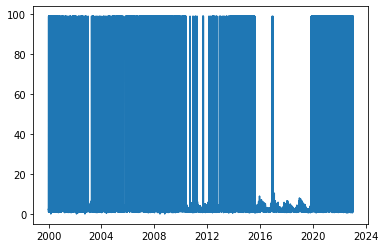

In [9]:
plt.plot(data_clean.wvht)

In [10]:
#remove bad wvht values === 99.0
data_wave = data_clean.loc[data_clean["wvht"] < 98]
print(data_wave.shape)
# remove wdir where values > 999.0
data = data_clean.loc[(data_clean["wdir"] < 999.0) & (data_clean["wvht"] < 98) ]
print(data.wdir.max())
print(data_wave)

(190318, 7)
360.0
                      wdir  wvht    dpd   apd    mwd   wtmp minute
time                                                              
2000-01-01 00:00:00  297.0  1.22   7.14  5.68  323.0   11.6    NaN
2000-01-01 01:00:00  305.0  1.33   6.67   5.6  320.0   11.7    NaN
2000-01-01 02:00:00  302.0  1.29   7.14  5.41  324.0   11.6    NaN
2000-01-01 03:00:00  304.0  1.22   7.14   5.7  320.0   11.6    NaN
2000-01-01 04:00:00  292.0  1.27   6.67   5.9  321.0   11.6    NaN
...                    ...   ...    ...   ...    ...    ...    ...
2022-12-31 19:00:00  172.0  2.99  13.79  6.54  281.0   12.5     40
2022-12-31 20:00:00  175.0  3.17  12.12  6.51  282.0  999.0     40
2022-12-31 21:00:00  181.0  3.38  14.81  6.57  303.0  999.0     40
2022-12-31 22:00:00  242.0  3.32  10.81  6.34  272.0  999.0     40
2022-12-31 23:00:00  307.0  3.86   12.9  7.17  272.0  999.0     40

[190318 rows x 7 columns]


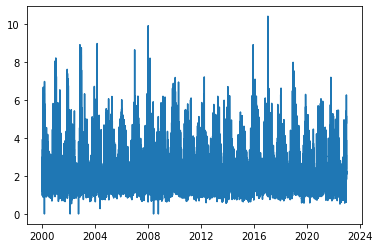

In [11]:
plt.plot(data_wave.wvht)

In [12]:
### Convert wvht: m to ft
data_wave_ft = data_wave.wvht * 3.28084
print(data_wave_ft)

time
2000-01-01 00:00:00     4.002625
2000-01-01 01:00:00     4.363517
2000-01-01 02:00:00     4.232284
2000-01-01 03:00:00     4.002625
2000-01-01 04:00:00     4.166667
                         ...    
2022-12-31 19:00:00     9.809712
2022-12-31 20:00:00    10.400263
2022-12-31 21:00:00    11.089239
2022-12-31 22:00:00    10.892389
2022-12-31 23:00:00    12.664042
Name: wvht, Length: 190318, dtype: float64


(10957.0, 19357.958333333332)

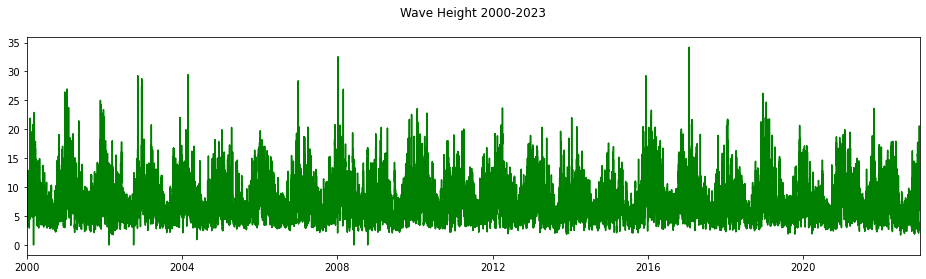

In [27]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
ax.plot(data_wave.wvht * 3.28084, color='green')
ax.set_title('Wave Height 2000-2023\n')
ax.set_xlim(data_wave.index[0],data_wave.index[-1])
#### shows all wave height measurements in Monterey Bay, California

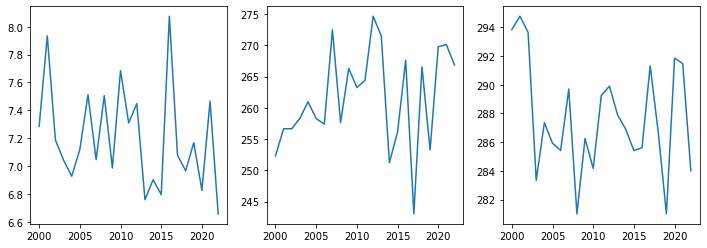

In [29]:
avg_by_year = data.groupby(data.index.year).mean()
# avg_wave_height_by_year = data.groupby('year')['wvht'].mean()
# avg_wave_height_by_month = df.groupby('month')['wvht'].mean()
# print(avg_by_year)
avg_by_year_wvht = data_wave_ft.groupby(data_wave_ft.index.year).mean()
# print(avg_by_year_wvht)
# print(avg_wave_height_by_month)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# axs[0].plot(avg_by_year.wvht)
axs[0].plot(avg_by_year_wvht)
axs[1].plot(avg_by_year.wdir)
axs[2].plot(avg_by_year.mwd)

Text(0.5, 1.0, 'Mean Monthly (FFT Mean) Wave Direction 2000-2023')

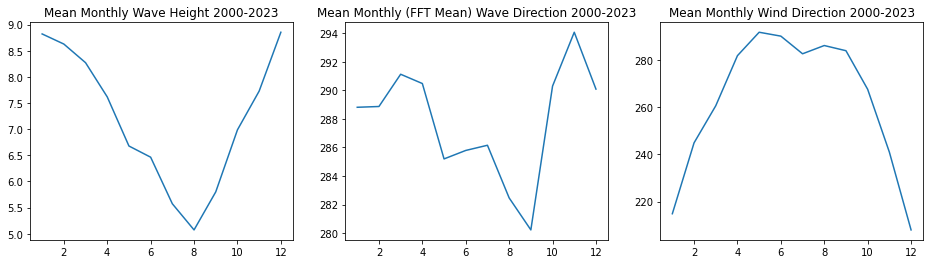

In [28]:
avg_by_month = data.groupby(data.index.month).mean()
# avg_wave_height_by_year = data.groupby('year')['wvht'].mean()
# avg_wave_height_by_month = df.groupby('month')['wvht'].mean()
# print(avg_by_month)
avg_by_month_wvht = data_wave_ft.groupby(data_wave_ft.index.month).mean()
# print(avg_by_month_wvht)
# print(avg_wave_height_by_month)

#### by month
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

axs[0].plot(avg_by_month_wvht)
axs[0].set_title('Mean Monthly Wave Height 2000-2023')
axs[2].plot(avg_by_month.wdir)
axs[2].set_title('Mean Monthly Wind Direction 2000-2023')
axs[1].plot(avg_by_month.mwd)
axs[1].set_title('Mean Monthly (FFT Mean) Wave Direction 2000-2023')

Text(0.5, 1.0, 'Mean Monthly Wave Height 2000-2023\n')

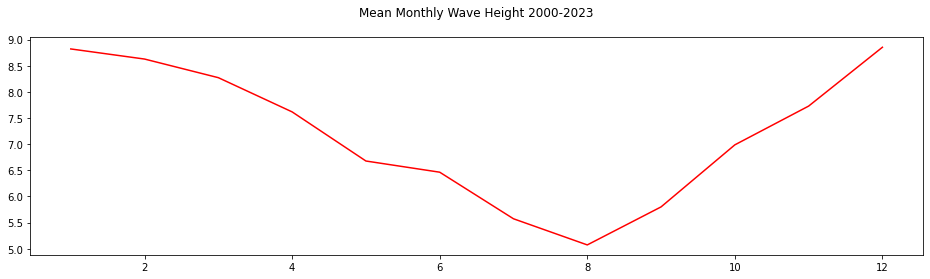

In [16]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
ax.plot(avg_by_month_wvht, color='red')
ax.set_title('Mean Monthly Wave Height 2000-2023\n')
#### shows the seasonal variablility in Monterey Bay, ca

Text(0.5, 1.0, 'Mean Yearly Wave Height 2000-2023\n')

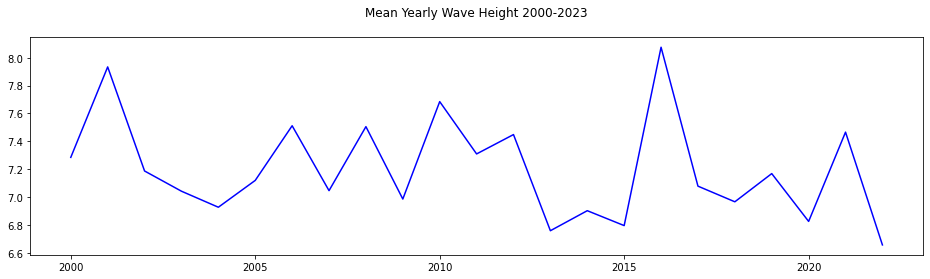

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
# axs[0].plot(avg_by_year.wvht)
ax.plot(avg_by_year_wvht,color='blue')
ax.set_title('Mean Yearly Wave Height 2000-2023\n')

### Doesnt answer the question is frequency of large wave events is changing through time?

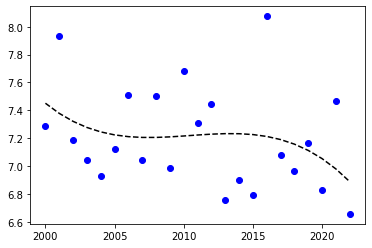

In [98]:
# avg by day isn't helpful
years = np.arange(2000,2023,1)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.scatter(years, avg_by_year_wvht, marker='o',color='blue')
# ax.set_ylim(6,9)
# ax.set_title('Year vs Average Wave Height (ft)')
x= years
y= avg_by_year_wvht
poly3 = np.polyfit(x,y,3)
poly3_object = np.poly1d(poly3)
poly3_val = np.polyval(poly3,x)
plt.plot(x,poly3_val, color='black',linestyle='dashed',label='Third Order Fit')

#### very short-sighted, further account for MJO, ENSO would better predict

In [57]:
# number of days above 15 ft?
# data_wave_ft & data are df's left using
data

,wdir,wvht,dpd,apd,mwd,wtmp,minute
time,,,,,,,
2000-01-01 00:00:00,297.0,1.22,7.14,5.68,323.0,11.6,NaN
2000-01-01 01:00:00,305.0,1.33,6.67,5.6,320.0,11.7,NaN
2000-01-01 02:00:00,302.0,1.29,7.14,5.41,324.0,11.6,NaN
2000-01-01 03:00:00,304.0,1.22,7.14,5.7,320.0,11.6,NaN
2000-01-01 04:00:00,292.0,1.27,6.67,5.9,321.0,11.6,NaN
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,172.0,2.99,13.79,6.54,281.0,12.5,40
2022-12-31 20:00:00,175.0,3.17,12.12,6.51,282.0,999.0,40
2022-12-31 21:00:00,181.0,3.38,14.81,6.57,303.0,999.0,40


Text(0.5, 0, 'Month')

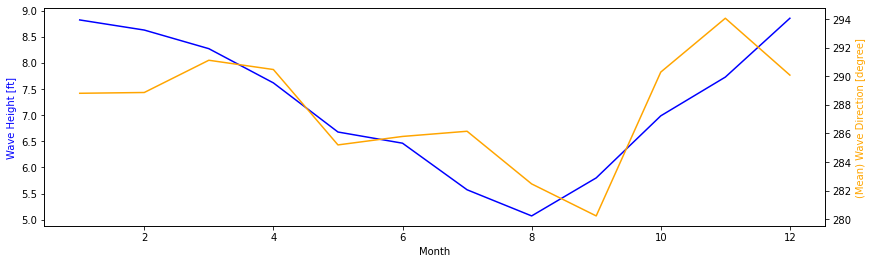

In [20]:
#### Wave direction and Wave Height are roughly correlated by monthly means
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(avg_by_month_wvht, color="blue")
ax2 = ax.twinx()
ax2.plot(avg_by_month.mwd, color="orange")
ax.set_ylabel('Wave Height [ft]', color='blue')
ax2.set_ylabel('(Mean) Wave Direction [degree]', color='orange')
ax.set_xlabel('Month')

      wvht
time      
2000    29
2001    39
2002    27
2003    18
2004    17
2005    20
2006    29
2007    18
2008    25
2009    19
2010    34
2011    15
2012    20
2013    15
2014    10
2015    20
2016    44
2017    24
2018    19
2019    32
2020    15
2021    32
2022    15


<AxesSubplot:xlabel='time'>

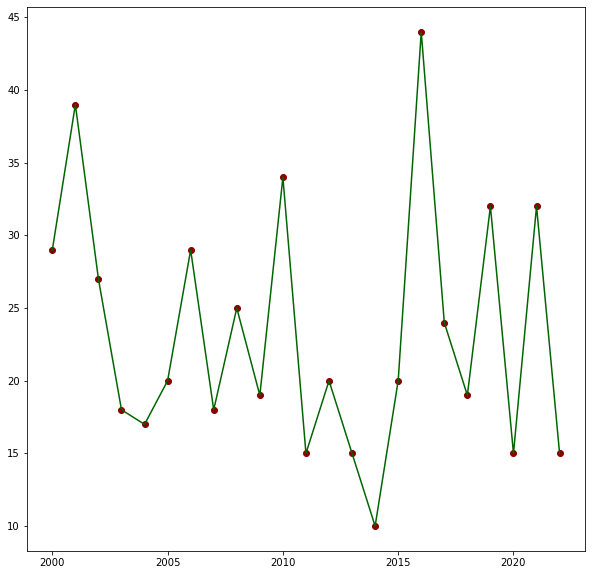

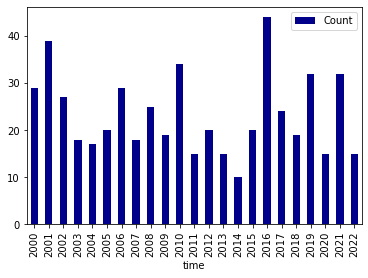

In [137]:
'''data_wave = data_clean.loc[data_clean["wvht"] < 98]'''
# print(data_wave)
#### resample by daily max and then select for only above 15 ft
data_wave_resample_daily_max = data_wave['wvht'].resample('1D').max()
# print(data_wave_resample_daily_max)
data_wave_resample_daily_max_ft = data_wave_resample_daily_max * 3.28084
data_wave_resample_daily_max_ft_clean = data_wave_resample_daily_max_ft.loc[data_wave_resample_daily_max_ft > 15] 
# print(data_wave_resample_daily_max_ft_clean)

#### convert series back to pd df and it's index is datetime!
new_data = data_wave_resample_daily_max_ft_clean.to_frame()
new_data2 = new_data.copy()

# new_data2.index

# data_wave = data_clean.loc[data_clean["wvht"] < 98]
# plt.scatter(np.arange(0,93),data_wave_resample_daily_max_ft_clean)
# df_new_2.to_csv('data2.txt', sep='\t')
# df['date'] = pd.to_datetime(df['date'])
yearly_counts = new_data2.groupby(new_data2.index.year).count()
print(yearly_counts)
#### plot
fig, ax = plt.subplots(1,1, figsize=(10,10))
# plt.plot(yearly_counts)
ax.scatter(np.arange(2000,2023,1),yearly_counts,color='darkred')
ax.plot(yearly_counts,color='darkgreen')

bx = yearly_counts.plot(kind='bar', color='darkblue')
# bx.legend().remove()
# bx
# Rename the legend
bx.legend(['Count'])
bx
# yearly_counts.plot(kind='bar')

In [ ]:
## read in 2023 file to find swell that took out piers?
